In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/fine_air.csv')
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,air_quality_class,predicted_air_quality_class
0,Burundi,Bujumbura,-3.38,29.36,Africa/Bujumbura,1694817000,2023-09-16 00:30,22.7,72.9,Clear,...,3,6,05:55 AM,06:00 PM,06:08 AM,06:25 PM,Waxing Crescent,0,Moderate,Moderate
1,Jamaica,Norman Gardens,17.97,-76.75,America/Jamaica,1700336700,2023-11-18 14:45,31.0,87.8,Partly cloudy,...,1,1,06:14 AM,05:30 PM,11:18 AM,10:37 PM,Waxing Crescent,24,Good,Good
2,India,New Delhi,28.60,77.20,Asia/Kolkata,1693955700,2023-09-06 04:45,29.0,84.2,Mist,...,4,10,06:01 AM,06:38 PM,10:12 PM,11:28 AM,Waning Gibbous,70,Unhealthy,Unhealthy
3,Romania,Bucharest,44.43,26.10,Europe/Bucharest,1694903400,2023-09-17 01:30,19.0,66.2,Partly cloudy,...,1,1,06:55 AM,07:25 PM,08:03 AM,08:04 PM,Waxing Crescent,1,Good,Good
4,Oman,Muscat,23.61,58.59,Asia/Muscat,1693611000,2023-09-02 03:30,30.0,86.0,Clear,...,2,4,05:48 AM,06:24 PM,07:35 PM,06:56 AM,Waning Gibbous,99,Moderate,Moderate


In [4]:
print(len(df.columns.to_list()))

43


In [5]:
df.isnull().sum()
#data = data.dropna()


country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [6]:
column_types = df.dtypes
print(column_types)

country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64
uv_index                        float64


In [7]:
air_quality_class_distribution = df['air_quality_class'].value_counts()

# Print the distribution
print(air_quality_class_distribution)

air_quality_class
Good                              10034
Moderate                           7804
Unhealthy                          5017
Unhealthy for Sensitive Groups     5017
Name: count, dtype: int64


In [8]:
# Drop the 'air_quality_gb-defra-index' column
df.drop(columns=['air_quality_gb-defra-index'], inplace=True)

In [9]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM10,air_quality_us-epa-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,air_quality_class,predicted_air_quality_class
0,Burundi,Bujumbura,-3.38,29.36,Africa/Bujumbura,1694817000,2023-09-16 00:30,22.7,72.9,Clear,...,102.0,3,05:55 AM,06:00 PM,06:08 AM,06:25 PM,Waxing Crescent,0,Moderate,Moderate
1,Jamaica,Norman Gardens,17.97,-76.75,America/Jamaica,1700336700,2023-11-18 14:45,31.0,87.8,Partly cloudy,...,4.2,1,06:14 AM,05:30 PM,11:18 AM,10:37 PM,Waxing Crescent,24,Good,Good
2,India,New Delhi,28.60,77.20,Asia/Kolkata,1693955700,2023-09-06 04:45,29.0,84.2,Mist,...,128.6,4,06:01 AM,06:38 PM,10:12 PM,11:28 AM,Waning Gibbous,70,Unhealthy,Unhealthy
3,Romania,Bucharest,44.43,26.10,Europe/Bucharest,1694903400,2023-09-17 01:30,19.0,66.2,Partly cloudy,...,4.9,1,06:55 AM,07:25 PM,08:03 AM,08:04 PM,Waxing Crescent,1,Good,Good
4,Oman,Muscat,23.61,58.59,Asia/Muscat,1693611000,2023-09-02 03:30,30.0,86.0,Clear,...,121.5,2,05:48 AM,06:24 PM,07:35 PM,06:56 AM,Waning Gibbous,99,Moderate,Moderate


                          temperature_celsius  humidity  wind_mph  \
temperature_celsius                  1.000000 -0.310018  0.111093   
humidity                            -0.310018  1.000000 -0.114911   
wind_mph                             0.111093 -0.114911  1.000000   
pressure_mb                         -0.466497 -0.000083 -0.152240   
uv_index                             0.329858 -0.146763  0.237278   
air_quality_PM2.5                    0.011701  0.037940 -0.152612   
air_quality_PM10                     0.124298 -0.134508 -0.056758   
air_quality_us-epa-index             0.057450 -0.116803 -0.250883   
moon_illumination                   -0.004660  0.007442  0.006912   

                          pressure_mb  uv_index  air_quality_PM2.5  \
temperature_celsius         -0.466497  0.329858           0.011701   
humidity                    -0.000083 -0.146763           0.037940   
wind_mph                    -0.152240  0.237278          -0.152612   
pressure_mb                  

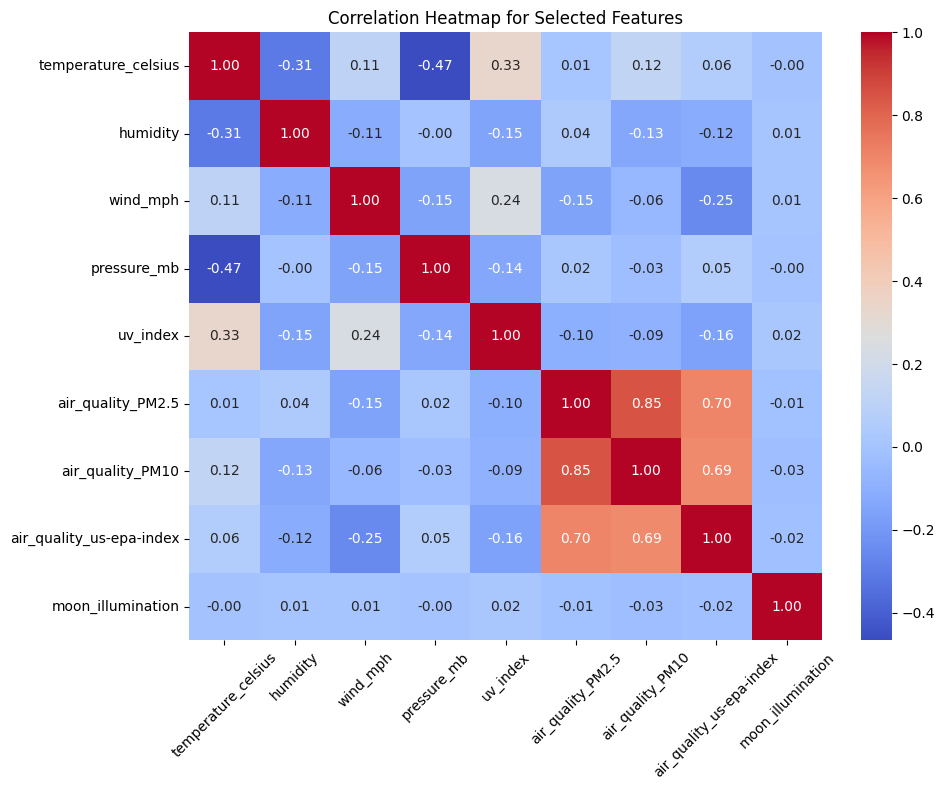

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

data=df
# Select a subset of features
selected_features = ['temperature_celsius', 'humidity', 'wind_mph', 'pressure_mb', 'uv_index',
                     'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
                      'moon_illumination']

# Subset the data
subset_data = data[selected_features]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()
print(correlation_matrix)
# Set diagonal to 1 for better clarity
correlation_matrix.values[[i for i in range(len(selected_features))], [i for i in range(len(selected_features))]] = 1

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Selected Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Feature and target separation
X = data[['temperature_celsius', 'humidity', 'wind_mph', 'pressure_mb', 'uv_index',
          'air_quality_PM2.5', 'air_quality_PM10', 'moon_illumination']]
y = data['air_quality_class']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [12]:

# Initialize and train XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softprob', random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

In [13]:
2332


# Decode predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred)
y_test = label_encoder.inverse_transform(y_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[2039    0    0    0]
 [   0 1558    0    0]
 [   0    0  994    0]
 [   0    0    0  984]]
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      2039
                      Moderate       1.00      1.00      1.00      1558
                     Unhealthy       1.00      1.00      1.00       994
Unhealthy for Sensitive Groups       1.00      1.00      1.00       984

                      accuracy                           1.00      5575
                     macro avg       1.00      1.00      1.00      5575
                  weighted avg       1.00      1.00      1.00      5575

Accuracy: 1.0


In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

# Assuming you have your trained XGBoost classifier and preprocessing objects
# Initialize XGBoost classifier (assuming it's already trained and saved)
classifier = xgb.XGBClassifier()

# Assuming you have already defined and trained your classifier and label_encoder as per previous steps

# Define and fit the StandardScaler on your training data
scaler = StandardScaler()  # Assuming you have defined your scaler
# Assuming X_train is your training data for which the scaler needs to be fit
X_train = np.array([[22,63,12,1011,2,50,120,99]])
scaler.fit(X_train)



StandardScaler()

Temperature in Celsius (e.g., 0 to 40):

Temperature in degrees Celsius, typically ranging from 0°C (freezing) to 40°C (hot). Humidity (percentage, e.g., 0 to 100):

Relative humidity in percentage, ranging from 0% (very dry) to 100% (completely saturated). Wind Speed in km/h (e.g., 0 to 100):

Wind speed in kilometers per hour, typically ranging from 0 km/h (calm) to 100 km/h (very strong winds). Pressure in millibars (e.g., 950 to 1050):

Atmospheric pressure in millibars, typically ranging from 950 mb (low pressure) to 1050 mb (high pressure). UV Index (e.g., 0 to 11):

UV index scale, ranging from 0 (minimal UV exposure) to 11+ (extreme UV exposure). PM2.5 Air Quality Index (e.g., 0 to 500):

PM2.5 air quality index, typically ranging from 0 (good air quality) to 500 (hazardous air quality). PM10 Air Quality Index (e.g., 0 to 500):

PM10 air quality index, typically ranging from 0 (good air quality) to 500 (hazardous air quality). Moon Illumination Percentage (e.g., 0 to 100):

Moon illumination percentage, ranging from 0% (new moon) to 100% (full moon).


In [16]:
import numpy as np

# Function to preprocess input data
def preprocess_input(input_data, scaler):
    # Convert input_data to numpy array
    input_array = np.array(input_data).reshape(1, -1)

    # Scale the input data using the fitted scaler
    scaled_input = scaler.transform(input_array)

    return scaled_input

# Function to predict using the classifier
def predict_air_quality(X_input, classifier, label_encoder):
    # Predict on preprocessed input
    y_pred = classifier.predict(X_input)

    # Decode predicted label
    y_pred_actual = label_encoder.inverse_transform(y_pred)

    return y_pred_actual[0]

def get_input(prompt, cast_type=float):
    while True:
        try:
            return cast_type(input(prompt))
        except ValueError:
            print("Invalid input. Please enter a valid number.")

# Get user input with error handling
input_values = [
    get_input("Enter temperature in Celsius: "),
    get_input("Enter humidity (percentage): "),
    get_input("Enter wind speed in mph: "),
    get_input("Enter pressure in mb: "),
    get_input("Enter UV index: ", int),
    get_input("Enter PM2.5 air quality index: "),
    get_input("Enter PM10 air quality index: "),
    get_input("Enter moon illumination percentage: ", int)
]

# Preprocess the input data using the fitted scaler
X_input = preprocess_input(input_values, scaler)

# Predict air quality class
predicted_class = predict_air_quality(X_input, classifier, label_encoder)

print(f"The predicted air quality class is: {predicted_class}")


Enter temperature in Celsius: 30
Enter humidity (percentage): 23
Enter wind speed in mph: 23
Enter pressure in mb: 34
Enter UV index: 34
Enter PM2.5 air quality index: 2
Enter PM10 air quality index: 2
Enter moon illumination percentage: 3
The predicted air quality class is: Good
